<a href="https://colab.research.google.com/github/2653319/book-example/blob/main/%E5%98%B2%E8%AB%B7%E6%96%87%E6%9C%AC%E8%B3%87%E6%96%99%E9%9B%86_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W3/ungraded_labs/C3_W3_Lab_5_sarcasm_with_bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 未分級實驗室：使用雙向 LSTM 訓練諷刺檢測模型

在本實驗中，您將重新訪問 [News Headlines Dataset for Sarcasm Detection](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/home) 數據集，並使用它來訓練一個雙 LSTM 模型。

## Download the Dataset

First, you will download the JSON file and extract the contents into lists.

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-06-01 06:14:51--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2022-06-01 06:14:51 (119 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])


## 拆分數據集

然後，您將列表拆分為訓練集和測試集。

In [ ]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## 數據預處理

接下來，您將生成詞彙表和填充序列。

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


## 構建和編譯模型

這裡的架構幾乎與您在上一個實驗室中使用 IMDB 評論時使用的架構相同。嘗試調整參數，看看它如何影響訓練時間和準確性（訓練和驗證）。

In [ ]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training_padded

array([[ 328,    1,  799, ...,    0,    0,    0],
       [   4, 6840, 3096, ...,    0,    0,    0],
       [ 153,  890,    2, ...,    0,    0,    0],
       ...,
       [  79, 1729,    1, ...,    0,    0,    0],
       [  53, 5108, 4735, ...,    0,    0,    0],
       [ 312,  705,    1, ...,    0,    0,    0]], dtype=int32)

In [ ]:
training_labels.dtype

dtype('int64')

## Train the Model

In [ ]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 17s 15ms/step - loss: 0.4174 - accuracy: 0.7933 - val_loss: 0.3215 - val_accuracy: 0.8605
Epoch 2/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2078 - accuracy: 0.9147 - val_loss: 0.3304 - val_accuracy: 0.8605
Epoch 3/10
625/625 [==============================] - 8s 13ms/step - loss: 0.1214 - accuracy: 0.9554 - val_loss: 0.4091 - val_accuracy: 0.8547
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0723 - accuracy: 0.9746 - val_loss: 0.5017 - val_accuracy: 0.8450
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0446 - accuracy: 0.9855 - val_loss: 0.6206 - val_accuracy: 0.8422
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.7419 - val_accuracy: 0.8401
Epoch 7/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0202 - accuracy: 0.9940 - val_loss: 0.7711 - val_accuracy: 0.837

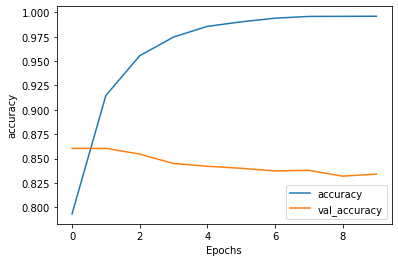

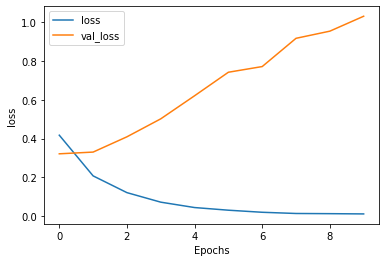

In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')